# Linear Regression




- We're going to look at linear regression, which is a supervised
learning algorithm that fits a straight line to your data.
- It's probably the most widely used machine learning algorithm in  the world.
- As you get familiar with linear regression, many of the concepts you see here will also apply to other machine learning models.

Say you want to predict the price of a house based on the size of the house. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("housing.csv")
df['price'] /= 1000 
df

,sqft,bedrooms,price
0,2104,3,399.900
1,1600,3,329.900
2,2400,3,369.000
3,1416,2,232.000
4,3000,4,539.900
5,1985,4,299.900
6,1534,3,314.900
7,1427,3,198.999
8,1380,3,212.000
9,1494,3,242.500


Here's the data as a graph, where we only plot square feet versus price: 

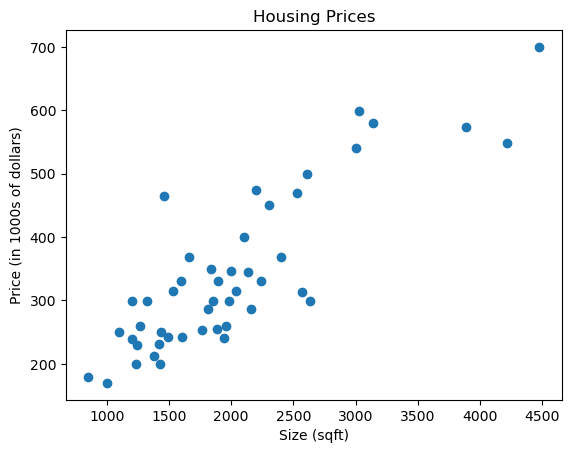

In [2]:
plt.scatter(df['sqft'], df['price'])
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (sqft)')
plt.show()

- Now, let's say you're a real estate agent and you're helping a client to sell their house. 
- The client is asking you, how much do you think I can get for this house? 
- This dataset might help you estimate the price she could get for it. 
- You start by measuring the size of the house, and it turns out that the house is 
1250 square feet. How much do you think this house could sell for?
- One thing you could do this, you can build a linear regression model from this dataset. Your model will fit a straight line to the data, which might look like this. 

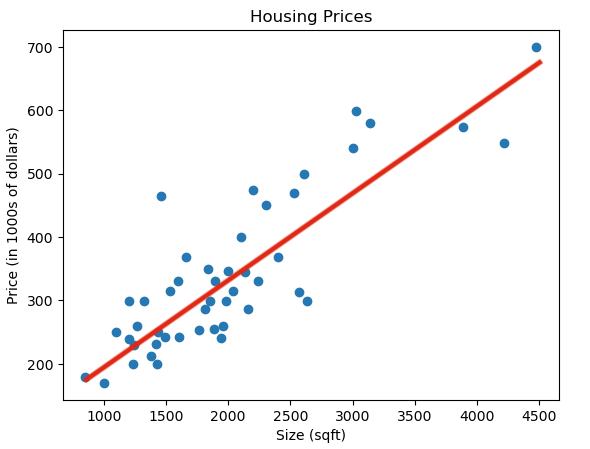

- This is an example of what's called a **supervised learning model**. 
- We call this supervised learning because you are training a model by providing data that has the right answers along with the examples. 
- It's called **regression** because it predicts numbers as the output.
- **Classification** is when we predict one of a finite number of categories rather than a number, like predicting
if a picture is of a dog or a cat, or if a patient has a disease or not, or one of many
diseases.

- Note how the plot corresponds to the data table.

## Notation and terminology

- Training set: data used to train the model
  - We will often use $x$ as the name to denote the variable or variables used as the 
  input to the model.
  - These variables are often called *features*.  So here, we have one feature $x$ which
  is size in square feet.
  - We use $y$ as the name of the output variable, the thing we are trying to predict. So here,
  $y$ is the price of the house (in thousands of dollars). 
  - We use $m$ as the number of training examples.  So here $m=47$.
  - We use $(x, y)$ to denote a single training example.  But we need a way to talk about which training example we care about, so
  we will use superscript numbers in parentheses: $(x^{(i)}, y^{(i)})$ is the $i$'th training example in the data set.



## What does linear regression do?

Remember that supervised learning works like this:
  - We have a training set of data.
  - We feed this training set to a learning algorithm.
  - The learning algorithm produces a function $f$.  Sometimes this function is called a hypothesis (and is denoted by $h$,
    rather than $f$).
  - $f$ is a function that can make new predictions about data similar to the data in the training set:  $f$ accepts $x$'s
    as inputs, and produces $y$'s as output.  We will call the output $\hat{y}$.
    <!-- draw picture here -->

$f$ is called the *model*.  A model takes features as inputs and produces predictions as outputs.

What are the inputs and predictions in our example?

## How do we represent $f$?

- This is a central issue in all of machine learning: choosing the right computational/algorithmic/mathematical formulation for our model.
- In linear regression, we will represent $f$ as a linear function, in particular:
- $f_{w, b}(x) = wx + b$
- Sometimes we will just write $f(x) = wx + b$.

### What is $f$ doing?
- $f$ is making predictions of $y$ using a straight line function of $x$.  $w$ and $b$ are called 
parameters that our algorithm must determine (learn).
- Why a linear function?  Linear models are easier than fitting more complex models with curves.

This is called univariate linear regression.  Univariate means we only have one input variable here,
$x$.

## Summary so far

Here is a summary of some of the notation you will encounter.  

|General   Notation  | Description| Python (if applicable) |
|------------|------------------------------------------------------------|-|
|  $\mathbf{x}$ | Training Example feature values   | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets   | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


# Cost function

In order to implement linear regression the first key step is first to define something called a cost function. The cost function will tell us how well the model is doing so that we can try to get it to do better.

Have so far:
- Training data: features and targets, or inputs and outputs.
- Model: $f_{w, b}(x) = wx+b$.

### $w$ and $b$

$w$ and $b$ are called **parameters**.  Sometimes called coefficients or weights.

- With linear regression, what you want to do is to choose values for the parameters $w$ and $b$ so that the straight line you get from the function $f$ somehow fits the data well. 
- You can think of this to mean that the line defined by $f$ is roughly passing through or somewhere close to the training examples as compared to other possible lines that are not as close to these points. 

- So we need to come up with some way to measure how well a possible line fits the training data.

- To do this, we will create a **cost function.**

The cost function we will use is:

$$J(w, b) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)^2$$

This is known as the squared error cost function.

In machine learning, different people will use different cost functions for different applications, but the squared error cost function is by far the most commonly used one for all regression problems.
 
Remember that $\hat{y}^{(i)} = f_{w,b}(x^{(i)})$ and 
$f_{w,b}(x^{(i)}) = wx^{(i)} + b$, so the entire cost function can be written as:

$$J(w, b) = \frac{1}{2m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)})  - y^{(i)} \right)^2$$

Because $J$ is a measure of errors (mistakes, in other words, how poorly we are doing), we want to make this function as small as possible.